<a href="https://colab.research.google.com/github/gwegayhu/Data-Science-Research/blob/master/Crop_Yield_Prediction_and_Precision_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crop Yield Prediction and Precision Agriculture

•	Objective: Predict crop yield and recommend optimal resource usage for farmers using geospatial data.

•	Tools/Techniques:
o	Combine multispectral imagery, soil data, and weather data.
o	Train machine learning models like Random Forest or XGBoost.
o	Use NDVI (Normalized Difference Vegetation Index) for vegetation health monitoring.

•	Outcome:
Improved yield predictions and recommendations for fertilizer or irrigation management.


Key Steps:
Synthetic Data Generation:

Simulate multispectral imagery (Red and NIR bands) to compute NDVI.
Include soil properties, weather features, and crop type.
Use random values for yield and resource usage.
NDVI Calculation:

Calculate NDVI as
(
NIR
−
Red
)
/
(
NIR
+
Red
)
(NIR−Red)/(NIR+Red), a key vegetation health metric.
Machine Learning Pipeline:

Train a Random Forest model or XGBoost on synthetic data.
Evaluate performance using RMSE (Root Mean Squared Error).
Recommendations:

Use feature importance from the model to recommend resources like fertilizer and irrigation.

In [1]:
# Import the Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [3]:
# Step 1: Synthetic Data Generation
np.random.seed(42)
n_samples = 2000

data = pd.DataFrame({
    'Farm_ID': [f'F{str(i).zfill(4)}' for i in range(1, n_samples + 1)],
    'Crop_Type': np.random.choice(['Cotton', 'Carrot', 'Wheat'], size=n_samples),
    'Soil_Type': np.random.choice(['Loamy', 'Sandy', 'Silty'], size=n_samples),
    'Season': np.random.choice(['Kharif', 'Rabi', 'Zaid'], size=n_samples),
    'Red_Band': np.random.uniform(0.1, 0.9, size=n_samples),  # Simulate Red band reflectance
    'NIR_Band': np.random.uniform(0.2, 1.0, size=n_samples),  # Simulate NIR band reflectance
    'Soil_Moisture': np.random.uniform(10, 50, size=n_samples),
    'Temperature': np.random.uniform(20, 40, size=n_samples),
    'Rainfall': np.random.uniform(50, 300, size=n_samples),
    'Fertilizer_Used(tons)': np.random.uniform(1, 10, size=n_samples),
    'Irrigation_Usage': np.random.uniform(500, 5000, size=n_samples),
    'Yield(tons)': np.random.uniform(5, 50, size=n_samples)
})

NDVI Calculation:

NDVI is computed using synthetic Red and NIR bands to assess vegetation health.

In [ ]:
# Calculate NDVI
data['NDVI'] = (data['NIR_Band'] - data['Red_Band']) / (data['NIR_Band'] + data['Red_Band'])

Feature Engineering:

Combines NDVI, soil, weather, and resource data to predict crop yield.

In [4]:
# Step 2: Prepare Features and Target
X = data.drop(columns=['Farm_ID', 'Yield(tons)'])
y = data['Yield(tons)']


Machine Learning Pipeline:

Handles preprocessing (scaling numerical features and encoding categorical features) and training in one step.

In [5]:
# Step 3: Preprocessing
categorical_features = ['Crop_Type', 'Soil_Type', 'Season']
numerical_features = ['NDVI', 'Soil_Moisture', 'Temperature', 'Rainfall', 'Fertilizer_Used(tons)', 'Irrigation_Usage']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [6]:
# Step 4: Model Pipeline
model = RandomForestRegressor(random_state=42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [7]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train the Model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['NDVI', 'Soil_Moisture',
                                                   'Temperature', 'Rainfall',
                                                   'Fertilizer_Used(tons)',
                                                   'Irrigation_Usage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Crop_Type', 'Soil_Type',
                                                   'Season'])])),
                ('model', RandomForestRegressor(random_state=42))])

Model Evaluation:

Uses RMSE to assess prediction accuracy.

In [9]:
# Step 7: Evaluate the Model
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 13.313179809123197


In [10]:
# Step 8: Save the Model
model_path = 'crop_yield_model.pkl'
joblib.dump(pipeline, model_path)
print(f"Model saved to {model_path}")

Model saved to crop_yield_model.pkl


In [11]:
# Step 9: Feature Importance and Recommendations
# Extract feature importance from Random Forest model
feature_importances = model.feature_importances_
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                  Feature  Importance
2             Temperature    0.159443
0                    NDVI    0.149645
3                Rainfall    0.147303
1           Soil_Moisture    0.145783
5        Irrigation_Usage    0.144256
4   Fertilizer_Used(tons)    0.142052
14            Season_Zaid    0.013504
13            Season_Rabi    0.012867
11        Soil_Type_Silty    0.012849
12          Season_Kharif    0.012547
6        Crop_Type_Carrot    0.012451
10        Soil_Type_Sandy    0.012184
7        Crop_Type_Cotton    0.012024
9         Soil_Type_Loamy    0.011917
8         Crop_Type_Wheat    0.011176



Recommendations:
Analyzes feature importance to guide optimal fertilizer and irrigation usage.

Outcome
Yield Prediction: Farmers can estimate crop yield based on resources and environmental conditions.

Resource Recommendations:

Guides farmers on efficient resource usage based on feature importance.


Crop Yield Prediction and Precision Agriculture_ Data [link text](https://)Analysis & Visualization


In [12]:
# Step 1: Load the Synthetic Dataset
# (Using previously generated synthetic data in `data`)
np.random.seed(42)

In [13]:
# Step 2: Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
          Red_Band     NIR_Band  Soil_Moisture  Temperature     Rainfall  \
count  2000.000000  2000.000000    2000.000000  2000.000000  2000.000000   
mean      0.491507     0.605297      30.014377    29.947515   175.428789   
std       0.232770     0.229669      11.556194     5.761088    71.889682   
min       0.100149     0.200502      10.007408    20.020446    50.029661   
25%       0.288723     0.413788      20.157860    25.125152   113.247482   
50%       0.489616     0.609954      30.088738    29.884257   176.876695   
75%       0.692926     0.799398      40.181251    34.837015   236.689916   
max       0.899240     0.999879      49.988306    39.992713   299.954180   

       Fertilizer_Used(tons)  Irrigation_Usage  Yield(tons)         NDVI  
count            2000.000000       2000.000000  2000.000000  2000.000000  
mean                5.498364       2711.661229    27.321913     0.116250  
std                 2.565315       1285.911731    13.031181     0.

In [15]:
# Step 3: Correlation Analysis
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                       Red_Band  NIR_Band  Soil_Moisture  Temperature  \
Red_Band               1.000000 -0.010771      -0.002703    -0.016807   
NIR_Band              -0.010771  1.000000      -0.017016     0.012492   
Soil_Moisture         -0.002703 -0.017016       1.000000    -0.004393   
Temperature           -0.016807  0.012492      -0.004393     1.000000   
Rainfall               0.003787  0.017404       0.002075     0.002610   
Fertilizer_Used(tons) -0.011059  0.017676       0.000416     0.006951   
Irrigation_Usage      -0.008660 -0.010509       0.007442     0.027107   
Yield(tons)            0.003921 -0.035322       0.004170     0.017466   
NDVI                  -0.776512  0.601785      -0.005545     0.015974   

                       Rainfall  Fertilizer_Used(tons)  Irrigation_Usage  \
Red_Band               0.003787              -0.011059         -0.008660   
NIR_Band               0.017404               0.017676         -0.010509   
Soil_Moisture       

In [ ]:
# Step 4: Analyze NDVI vs. Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='NDVI', y='Yield(tons)', hue='Crop_Type')
plt.title("NDVI vs. Yield")
plt.xlabel("NDVI")
plt.ylabel("Yield (tons)")
plt.show()


Correlation Matrix:
                       Red_Band  NIR_Band  Soil_Moisture  Temperature  \
Red_Band               1.000000 -0.010771      -0.002703    -0.016807   
NIR_Band              -0.010771  1.000000      -0.017016     0.012492   
Soil_Moisture         -0.002703 -0.017016       1.000000    -0.004393   
Temperature           -0.016807  0.012492      -0.004393     1.000000   
Rainfall               0.003787  0.017404       0.002075     0.002610   
Fertilizer_Used(tons) -0.011059  0.017676       0.000416     0.006951   
Irrigation_Usage      -0.008660 -0.010509       0.007442     0.027107   
Yield(tons)            0.003921 -0.035322       0.004170     0.017466   
NDVI                  -0.776512  0.601785      -0.005545     0.015974   

                       Rainfall  Fertilizer_Used(tons)  Irrigation_Usage  \
Red_Band               0.003787              -0.011059         -0.008660   
NIR_Band               0.017404               0.017676         -0.010509   
Soil_Moisture       

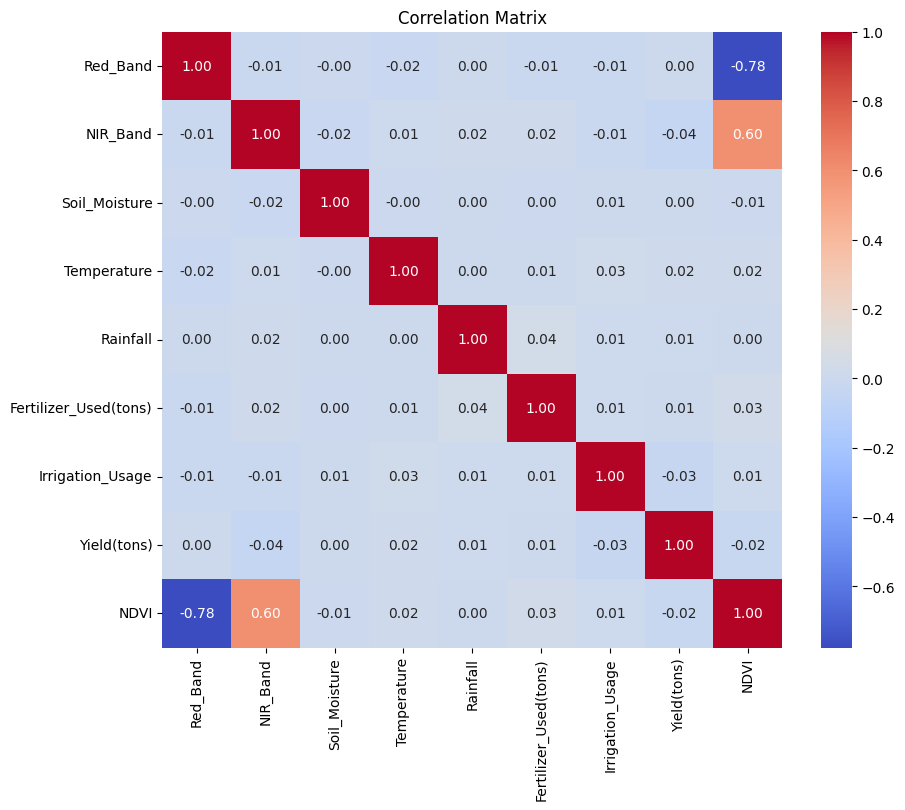

In [17]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Step 1: Load the Synthetic Dataset
# (Using previously generated synthetic data in `data`)
np.random.seed(42)

# ... (rest of your code) ...

# Step 3: Correlation Analysis
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Now plt is defined and can be used
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# ... (rest of your code) ...

In [20]:
# Step 6: Regression Diagnostics
y_pred = rf_model.predict(pd.get_dummies(X_test))
residuals = y_test - y_pred

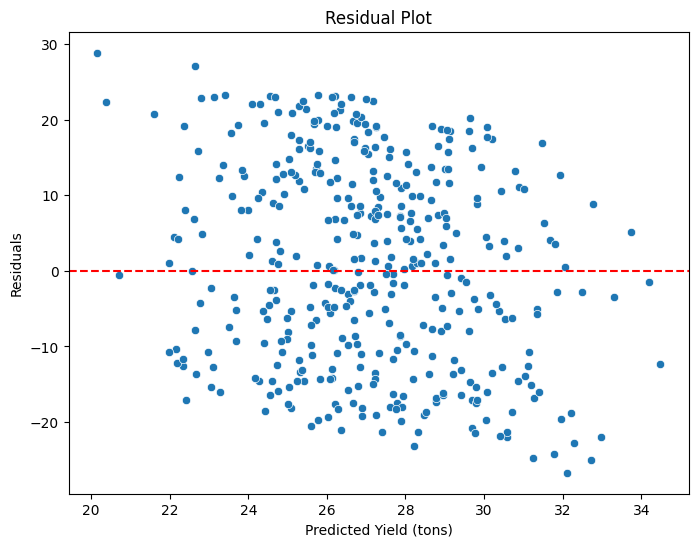

In [21]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Yield (tons)")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

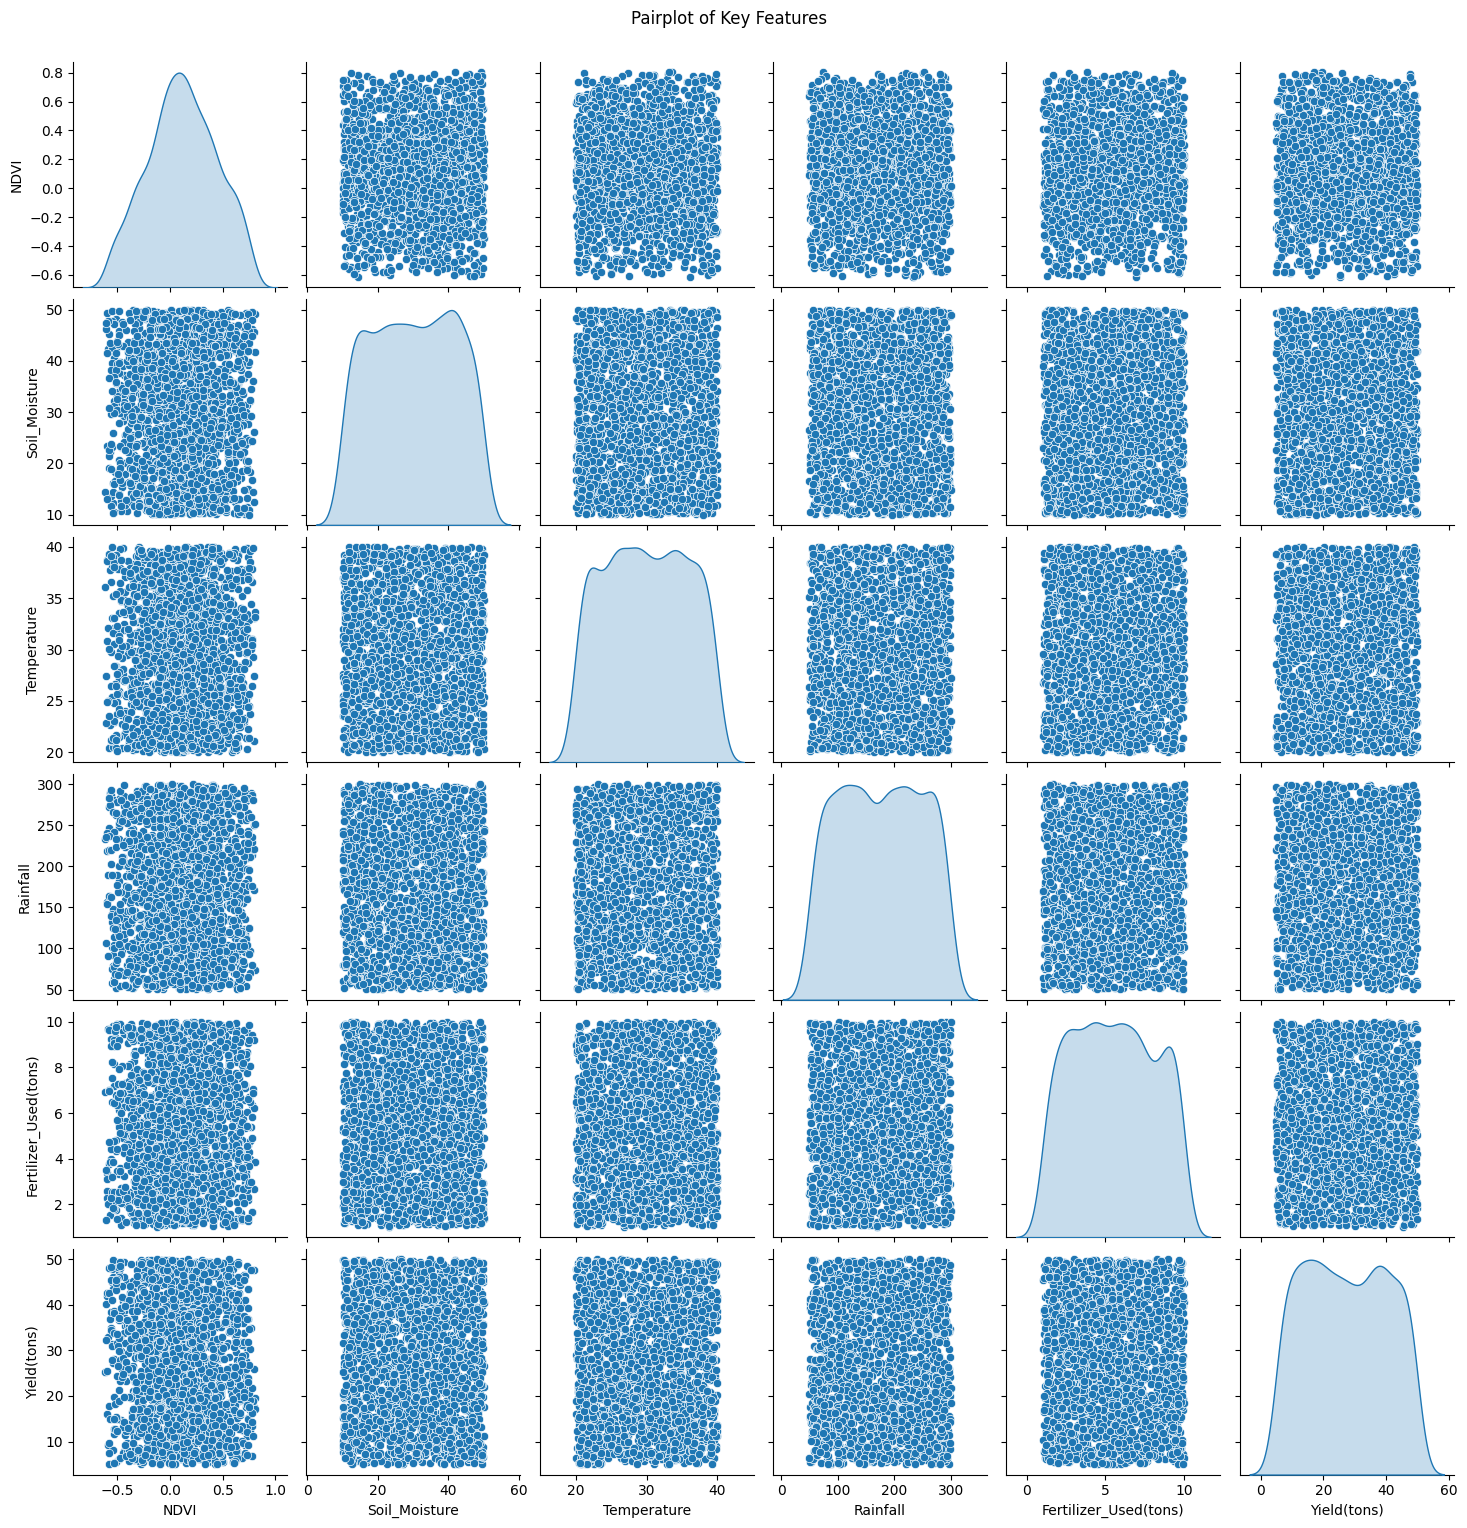

In [22]:
# Step 7: Generate Pairplot for Key Features
key_features = ['NDVI', 'Soil_Moisture', 'Temperature', 'Rainfall', 'Fertilizer_Used(tons)', 'Yield(tons)']
sns.pairplot(data[key_features], diag_kind='kde', palette="husl")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

In [23]:
# Step 8: Summary of Results
# RMSE of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nTop 3 Features Influencing Yield:")
print(feature_importance_df.head(3))

Root Mean Squared Error (RMSE): 13.363115275526447

Top 3 Features Influencing Yield:
       Feature  Importance
2  Temperature    0.159443
0         NDVI    0.149645
3     Rainfall    0.147303
